In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from scipy.linalg import eigh

%matplotlib inline

$\large{\text{Question 1}}$

\begin{equation}
O_i = \left( \bigotimes_{j=1}^{i-1}~I\right)~\otimes~O~\otimes~ \left(\bigotimes_{j=i+1}^{N}~I\right)
\end{equation}

In [2]:
σ_z = np.array([[1, 0],
                [0, -1]])

In [3]:
def O(N, i, o):
    
    if i == 0:
        M = np.kron(o, np.identity(2**(N)))
    else:
        M = np.kron(np.identity(2**(i-1)),\
                    np.kron(o, np.identity(2**(N-i))))
        
    return M

In [4]:
print(O(3, 2, σ_z))

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -0.  0.  0. -0. -0.]
 [ 0.  0. -0. -1.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -0. -0.  0.  0. -1. -0.]
 [ 0.  0. -0. -0.  0.  0. -0. -1.]]


In [6]:
print(O(3, 1,σ_z).shape)

(8, 8)


$\large{\text{Question 2}}$

\begin{equation}
H = J\sum_{<i,j>} S_i^zS_j^z-g\sum_{i=1}^{N}S_i^z
\end{equation}

In [7]:
def H(g, J, N):
    
    S_1 = 0 # 1st term
    S_2 = 0 # 2nd term
    
    for j in range(1, N):
        S_1 += np.dot(O(N, j, σ_z),O(N, j+1, σ_z))
    
    # wrapping at boundary
    S_1 += np.dot(O(N, N, σ_z),O(N, 1, σ_z))
    
    for j in range(1, N+1):
        S_2 += O(N, j, σ_z)
    
    return J * S_1 - g * S_2

In [8]:
print(H(1, 1, 2))

[[ 0.  0.  0.  0.]
 [ 0. -2.  0.  0.]
 [ 0.  0. -2.  0.]
 [ 0.  0.  0.  4.]]


$\large{\text{Question 3}}$

In [88]:
def basis(N):
    m = 1 # initial state = 1x1 identity
    
    for i in range(N):
        m = np.kron(m, np.identity(2))
        
    return m

In [89]:
print(basis(4))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [90]:
basis(4).shape

(16, 16)

$\large{\text{Question 4}}$

\begin{equation}
O|\Psi\rangle = |\Psi'\rangle
\end{equation}

\begin{equation}
\langle\Psi|\Psi\rangle = \langle O\rangle_{\Psi}
\end{equation}

In [14]:
def exp_val(O, Ψ):
    
    Ψ_prime = np.dot(O, Ψ)
    
    return np.dot(Ψ.transpose(), Ψ_prime)

In [15]:
ψ = np.array([1, 0])

print(exp_val(σ_z, ψ))

1


$\large{\text{Question 5}}$

\begin{equation}
H|\Psi\rangle = E|\Psi\rangle
\end{equation}

In [16]:
def eig(H):
    
    w, v = eigh(H)
    
    return w, v

In [17]:
x, y = eig(H(1, 1, 2))

for i in range(len(x)):
    print(x[i], y[i])

-2.0 [0. 0. 1. 0.]
-2.0 [1. 0. 0. 0.]
0.0 [0. 1. 0. 0.]
4.0 [0. 0. 0. 1.]


$\large{\text{Question 6}}$

In [18]:
η = np.linspace(-3, 3, 50)
g = 10 ** - η

\begin{equation}
m = \sum_i\langle S^N\rangle
\end{equation}

In [19]:
m = np.zeros(len(g))

for i in range(len(g)):
    # finding the eigenvalues and eigenvectors
    w, v = eig(H(g[i], 1, 4))
    
    for j in range(4):
        # finding the sum of the exp. value for each i of Si & g.s.
        m[i] += exp_val(O(4, j+1, σ_z), v[:,0])

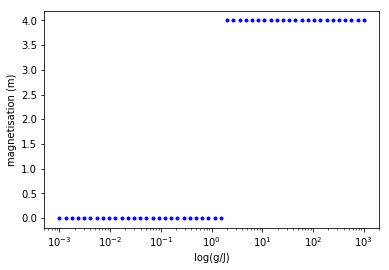

In [20]:
plt.semilogx(g, m, 'b.')
plt.xlabel('log(g/J)')
plt.ylabel('magnetisation (m)')
plt.savefig('q6_pt1.png')

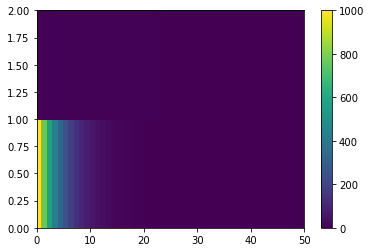

In [99]:
b = plt.pcolor([g,m])
plt.colorbar(b)
plt.savefig('q6_pt1b.png')

\begin{equation}
m_i = \langle S_i^z\rangle
\end{equation}

In [21]:
m_i = []

for i in range(len(g)):
    # finding the eigenvalues and basis
    w, v = eig(H(g[i], 1, 4))

    m_temp = []
    
    for j in range(4): # N=4
        # finding the exp. value for each i of Si & g.s.
        m_temp.append(exp_val(O(4, j+1, σ_z), v[:,0]))
        
    m_i.append(m_temp)

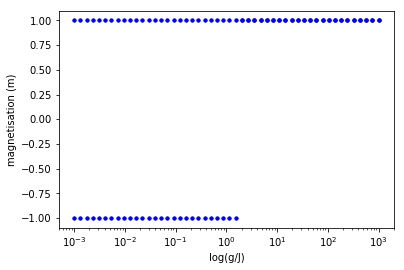

In [22]:
plt.semilogx(g, m_i, 'b.')
plt.xlabel('log(g/J)')
plt.ylabel('magnetisation (m)')
plt.savefig('q6_pt2.png')

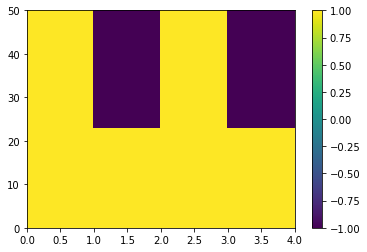

In [100]:
c = plt.pcolor(m_i)
plt.colorbar(c)
plt.savefig('q6_pt2b.png')

\begin{equation}
\psi_i = \langle m_i|0_N\rangle
\end{equation}

In [94]:
Ψ_i = []

for i in range(len(g)):
    # finding the eigenvalues and basis
    w, v = eig(H(g[i], 1, 4))
    Ψ_i.append(np.dot(basis(4), v[:,0]))

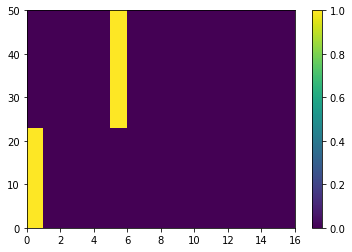

In [95]:
d = plt.pcolor(m_temp)
plt.colorbar(d)
plt.savefig('q6_pt3.png')

$\large{\text{Question 7}}$

\begin{equation}
H = J\sum_{<i,j>}S_i^zS_j^z-g\sum_{i=1}^NS_i^x
\end{equation}

In [96]:
σ_x = np.array([[0, 1],
                [1, 0]])

In [102]:
def H2(g, J, N):
    
    S_3 = 0 # 1st term
    S_4 = 0 # 2nd term
    
    for j in range(1, N):
        S_3 += np.dot(O(N, j, σ_z),O(N, j+1, σ_z))
    
    # wrapping at boundary
    S_3 += np.dot(O(N, N, σ_z),O(N, 1, σ_z))
    
    for j in range(1, N+1):
        S_4 += O(N, j, σ_x)
    
    return J * S_3 - g * S_4

In [103]:
m2 = np.zeros(len(g))

for i in range(len(g)):
    # finding the eigenvalues and eigenvectors
    w, v = eig(H2(g[i], 1, 4))
    
    for j in range(4):
        # finding the sum of the exp. value for each i of Si & g.s.
        m2[i] += exp_val(O(4, j+1, σ_z), v[:,0])

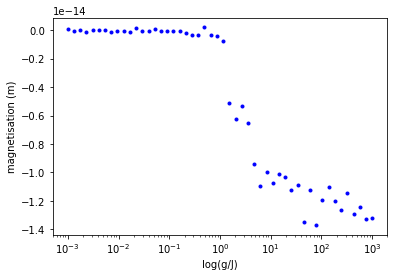

In [104]:
plt.semilogx(g, m2, 'b.')
plt.xlabel('log(g/J)')
plt.ylabel('magnetisation (m)')
plt.savefig('q7_pt1.png')

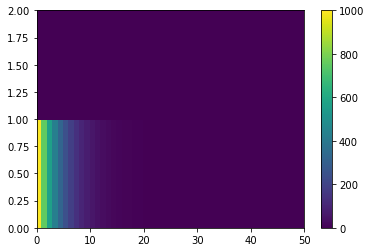

In [105]:
e = plt.pcolor([g,m2])
plt.colorbar(e)
plt.savefig('q7_pt1b.png')

In [106]:
m_i2 = []

for i in range(len(g)):
    # finding the eigenvalues and basis
    w, v = eig(H2(g[i], 1, 4))

    m_temp = []
    
    for j in range(4): # N=4
        # finding the exp. value for each i of Si & g.s.
        m_temp.append(exp_val(O(4, j+1, σ_z), v[:,0]))
        
    m_i2.append(m_temp)

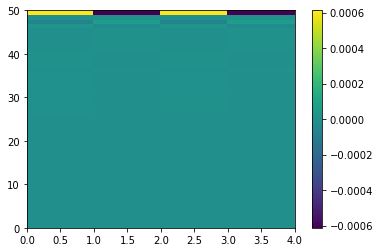

In [113]:
f = plt.pcolor(m_i2)
plt.colorbar(f)
plt.savefig('q7_pt2b.png')

In [108]:
Ψ_i2 = []

for i in range(len(g)):
    # finding the eigenvalues and basis
    w, v = eig(H2(g[i], 1, 4))
    Ψ_i2.append(np.dot(basis(4), v[:,0]))

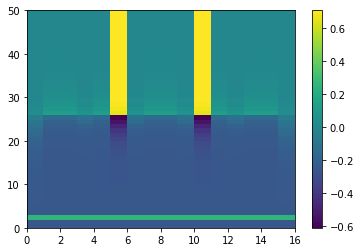

In [110]:
g = plt.pcolor(Ψ_i2)
plt.colorbar(g)
plt.savefig('q7_pt3.png')

$\large{\text{Question 8}}$

In [119]:
x2, y2 = eig(H2(0, 1, 4))

for i in range(len(x2)):
    print(x2[i], y2[i])

-4.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
-4.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
4.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [127]:
for i in range(len(y2)):
    print(exp_val(O(4, 4, σ_z), y2[i]))

1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
